<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/labs/JPMC_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# John Mohsbeck Day 3 Lab -- Run sklearn ML models
# Download dataset a binary classification dataset
# dataset name: IBM-HR-Analytics-Employee-Attrition-Performance
# Analyze the data
# Run sklearn ML models using Algorithm Harness
# Review the results

In [5]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [6]:
# load a dataset from openML
# download IBM Attrition dataset
# Attrition column: Yes(employee leaves) or No(employee stays)
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
import certifi
from sklearn.datasets import fetch_openml 
# Download the dataset from openml
dataset = fetch_openml(data_id=43696, as_frame=True)
#Extract feature matrix X and show 5 random samples
df = dataset["frame"]
pd.set_option("display.max_columns", None)
df.sample(5)




/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
479,24,Yes,Travel_Frequently,1287,Research Development,7,3,Life Sciences,1,647,1,Female,55,3,1,Laboratory Technician,3,Married,2886,14168,1,Y,Yes,16,3,4,80,1,6,4,3,6,3,1,2
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0
928,44,Yes,Travel_Rarely,621,Research Development,15,3,Medical,1,1295,1,Female,73,3,3,Healthcare Representative,4,Married,7978,14075,1,Y,No,11,3,4,80,1,10,2,3,10,7,0,5
1305,54,No,Travel_Rarely,431,Research Development,7,4,Medical,1,1830,4,Female,68,3,2,Research Scientist,4,Married,6854,15696,4,Y,No,15,3,2,80,1,14,2,2,7,1,1,7
698,35,No,Travel_Rarely,1219,Sales,18,3,Medical,1,975,3,Female,86,3,2,Sales Executive,3,Married,4601,6179,1,Y,No,16,3,2,80,0,5,3,3,5,2,1,0


In [7]:
len(df)

1470

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.shape

(1470, 35)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [13]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [14]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,1,2,female,94,3,2,sales_executive,4,single,5993,19479,8,y,yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,no,travel_frequently,279,research__development,8,1,life_sciences,1,2,3,male,61,2,2,research_scientist,2,married,5130,24907,1,y,no,23,4,4,80,1,10,3,3,10,7,1,7
2,37,yes,travel_rarely,1373,research__development,2,2,other,1,4,4,male,92,2,1,laboratory_technician,3,single,2090,2396,6,y,yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,no,travel_frequently,1392,research__development,3,4,life_sciences,1,5,4,female,56,3,1,research_scientist,3,married,2909,23159,1,y,yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,no,travel_rarely,591,research__development,2,1,medical,1,7,1,male,40,3,1,laboratory_technician,2,married,3468,16632,9,y,no,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
df['attrition'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
df['attrition'].value_counts()

no     1233
yes     237
Name: attrition, dtype: int64

In [17]:
df = df[df.attrition != 'No']
df.attrition.value_counts() 

no     1233
yes     237
Name: attrition, dtype: int64

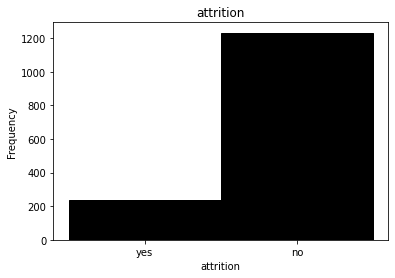

In [18]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
plt.figure(figsize=(6, 4))

sns.histplot(df.attrition, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('attrition')
plt.title('attrition')

plt.show()

Notes
(1) Check for NaN under a single DataFrame column:

df['your column name'].isnull().values.any()

(2) Count the NaN under a single DataFrame column:

df['your column name'].isnull().sum()

(3) Check for NaN under an entire DataFrame:
df.isnull().values.any()

(4) Count the NaN under an entire DataFrame:
df.isnull().sum().sum()

In [19]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [20]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
# df = df.drop(['x5_latitude', 'x6_longitude', 'x1_transaction_date'], axis=1)
# df

In [22]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.5, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(735, 735)

In [23]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.attrition).values
y_test = (df_test.attrition).values
del df_train_full['attrition']
del df_test['attrition']

In [24]:
len(y_train),len(y_test)


(735, 735)

In [25]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
# IF YOU HAVE CAT values... we need to encode them... pandas get dummies OR dictionary vectorizor OR several other examples... allow us to encode
# this example will work with ANY cat data.
# IBM attrtion has 9 Categorical columns
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [26]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.feature_names_  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [27]:
features

['age',
 'businesstravel=non-travel',
 'businesstravel=travel_frequently',
 'businesstravel=travel_rarely',
 'dailyrate',
 'department=human_resources',
 'department=research__development',
 'department=sales',
 'distancefromhome',
 'education',
 'educationfield=human_resources',
 'educationfield=life_sciences',
 'educationfield=marketing',
 'educationfield=medical',
 'educationfield=other',
 'educationfield=technical_degree',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'gender=female',
 'gender=male',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobrole=healthcare_representative',
 'jobrole=human_resources',
 'jobrole=laboratory_technician',
 'jobrole=manager',
 'jobrole=manufacturing_director',
 'jobrole=research_director',
 'jobrole=research_scientist',
 'jobrole=sales_executive',
 'jobrole=sales_representative',
 'jobsatisfaction',
 'maritalstatus=divorced',
 'maritalstatus=married',
 'maritalstatus=single',
 'monthlyincome',
 'monthlyrate',
 'numcompanies

In [28]:
X_test.shape

(735, 55)

LR: 0.880267 (0.027135)
Score for each of the 10 K-fold tests:  [0.91891892 0.86486486 0.87837838 0.85135135 0.89189189 0.89041096
 0.90410959 0.90410959 0.82191781 0.87671233]
LogisticRegression(solver='liblinear')
	Training time: 0.032s
	Prediction time: 0.309s

LDA: 0.872103 (0.025291)
Score for each of the 10 K-fold tests:  [0.90540541 0.86486486 0.85135135 0.85135135 0.89189189 0.90410959
 0.8630137  0.89041096 0.82191781 0.87671233]
LinearDiscriminantAnalysis()
	Training time: 0.048s
	Prediction time: 0.558s

KNN: 0.825768 (0.035263)
Score for each of the 10 K-fold tests:  [0.85135135 0.87837838 0.78378378 0.83783784 0.83783784 0.84931507
 0.79452055 0.8630137  0.78082192 0.78082192]
KNeighborsClassifier()
	Training time: 0.002s
	Prediction time: 0.950s

CART: 0.839504 (0.039636)
Score for each of the 10 K-fold tests:  [0.89189189 0.7972973  0.7972973  0.82432432 0.85135135 0.8630137
 0.82191781 0.91780822 0.79452055 0.83561644]
DecisionTreeClassifier(max_depth=4, min_samples_lea

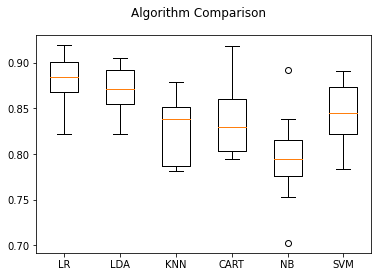

In [29]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
params = {'min_samples_leaf': [1, 3],'max_depth': [4,6,8],'min_samples_split': [2,4]}
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('CART', DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
# scoring = 'roc_auc'
scoring = 'accuracy'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [30]:
# once you have identified a couple of models... being to drill down and tweak it
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [31]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.feature_names_)
type(dt.feature_importances_)
dv.feature_names_

['age',
 'businesstravel=non-travel',
 'businesstravel=travel_frequently',
 'businesstravel=travel_rarely',
 'dailyrate',
 'department=human_resources',
 'department=research__development',
 'department=sales',
 'distancefromhome',
 'education',
 'educationfield=human_resources',
 'educationfield=life_sciences',
 'educationfield=marketing',
 'educationfield=medical',
 'educationfield=other',
 'educationfield=technical_degree',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'gender=female',
 'gender=male',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobrole=healthcare_representative',
 'jobrole=human_resources',
 'jobrole=laboratory_technician',
 'jobrole=manager',
 'jobrole=manufacturing_director',
 'jobrole=research_director',
 'jobrole=research_scientist',
 'jobrole=sales_executive',
 'jobrole=sales_representative',
 'jobsatisfaction',
 'maritalstatus=divorced',
 'maritalstatus=married',
 'maritalstatus=single',
 'monthlyincome',
 'monthlyrate',
 'numcompanies

In [33]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [34]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.039 age
0.000 businesstravel=non-travel
0.000 businesstravel=travel_frequently
0.020 businesstravel=travel_rarely
0.052 dailyrate
0.000 department=human_resources
0.039 department=research__development
0.000 department=sales
0.047 distancefromhome
0.011 education
0.000 educationfield=human_resources
0.000 educationfield=life_sciences
0.009 educationfield=marketing
0.000 educationfield=medical
0.000 educationfield=other
0.008 educationfield=technical_degree
0.000 employeecount
0.054 employeenumber
0.047 environmentsatisfaction
0.000 gender=female
0.000 gender=male
0.025 hourlyrate
0.014 jobinvolvement
0.000 joblevel
0.002 jobrole=healthcare_representative
0.000 jobrole=human_resources
0.010 jobrole=laboratory_technician
0.000 jobrole=manager
0.019 jobrole=manufacturing_director
0.000 jobrole=research_director
0.036 jobrole=research_scientist
0.000 jobrole=sales_executive
0.008 jobrole=sales_representative
0.032 jobsatisfaction
0.007 maritalstatus=divorced
0.000 maritalstatus=married
0

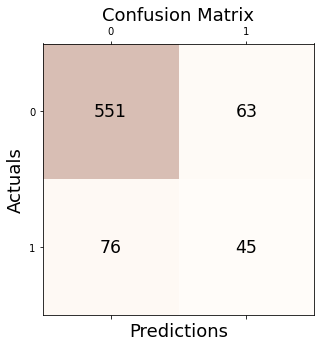

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.88      0.90      0.89       614
         yes       0.42      0.37      0.39       121

    accuracy                           0.81       735
   macro avg       0.65      0.63      0.64       735
weighted avg       0.80      0.81      0.81       735



In [37]:
# Take a peek at your predictions:
# Take a look at the first 10 rows and compare the predictions.
pred_y = dt.predict(X_test)
#len(pred_y)
#print(pred_y)
print("The first 10 prediction {}".format(pred_y[:10]))
print("The real first 10 labels {}".format(y_test[:10]))

The first 10 prediction ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no']
The real first 10 labels ['yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no']


In [38]:
# How to make predictions with BRAND NEW VALUES
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [39]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert ANY record into a dictionary.
# This is important because when you want to make a prediction - it must be in this format
df_train_full.iloc[[568]]

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1400,38,travel_frequently,1444,human_resources,1,4,other,1,1972,4,male,88,3,1,human_resources,2,married,2991,5224,0,y,yes,11,3,2,80,1,7,2,3,6,2,1,2


In [40]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[568]].to_dict('records')[0]

{'age': 38,
 'businesstravel': 'travel_frequently',
 'dailyrate': 1444,
 'department': 'human_resources',
 'distancefromhome': 1,
 'education': 4,
 'educationfield': 'other',
 'employeecount': 1,
 'employeenumber': 1972,
 'environmentsatisfaction': 4,
 'gender': 'male',
 'hourlyrate': 88,
 'jobinvolvement': 3,
 'joblevel': 1,
 'jobrole': 'human_resources',
 'jobsatisfaction': 2,
 'maritalstatus': 'married',
 'monthlyincome': 2991,
 'monthlyrate': 5224,
 'numcompaniesworked': 0,
 'over18': 'y',
 'overtime': 'yes',
 'percentsalaryhike': 11,
 'performancerating': 3,
 'relationshipsatisfaction': 2,
 'standardhours': 80,
 'stockoptionlevel': 1,
 'totalworkingyears': 7,
 'trainingtimeslastyear': 2,
 'worklifebalance': 3,
 'yearsatcompany': 6,
 'yearsincurrentrole': 2,
 'yearssincelastpromotion': 1,
 'yearswithcurrmanager': 2}

In [41]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.head(568).to_dict('records')[0]

{'age': 38,
 'businesstravel': 'non-travel',
 'dailyrate': 152,
 'department': 'sales',
 'distancefromhome': 10,
 'education': 3,
 'educationfield': 'technical_degree',
 'employeecount': 1,
 'employeenumber': 983,
 'environmentsatisfaction': 3,
 'gender': 'female',
 'hourlyrate': 85,
 'jobinvolvement': 3,
 'joblevel': 2,
 'jobrole': 'sales_executive',
 'jobsatisfaction': 4,
 'maritalstatus': 'single',
 'monthlyincome': 5666,
 'monthlyrate': 19899,
 'numcompaniesworked': 1,
 'over18': 'y',
 'overtime': 'yes',
 'percentsalaryhike': 13,
 'performancerating': 3,
 'relationshipsatisfaction': 2,
 'standardhours': 80,
 'stockoptionlevel': 0,
 'totalworkingyears': 6,
 'trainingtimeslastyear': 1,
 'worklifebalance': 3,
 'yearsatcompany': 5,
 'yearsincurrentrole': 3,
 'yearssincelastpromotion': 1,
 'yearswithcurrmanager': 3}

In [42]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[568]].to_dict('records')[0]
actual = y_train[[568]]

In [43]:
item


{'age': 38,
 'businesstravel': 'travel_frequently',
 'dailyrate': 1444,
 'department': 'human_resources',
 'distancefromhome': 1,
 'education': 4,
 'educationfield': 'other',
 'employeecount': 1,
 'employeenumber': 1972,
 'environmentsatisfaction': 4,
 'gender': 'male',
 'hourlyrate': 88,
 'jobinvolvement': 3,
 'joblevel': 1,
 'jobrole': 'human_resources',
 'jobsatisfaction': 2,
 'maritalstatus': 'married',
 'monthlyincome': 2991,
 'monthlyrate': 5224,
 'numcompaniesworked': 0,
 'over18': 'y',
 'overtime': 'yes',
 'percentsalaryhike': 11,
 'performancerating': 3,
 'relationshipsatisfaction': 2,
 'standardhours': 80,
 'stockoptionlevel': 1,
 'totalworkingyears': 7,
 'trainingtimeslastyear': 2,
 'worklifebalance': 3,
 'yearsatcompany': 6,
 'yearsincurrentrole': 2,
 'yearssincelastpromotion': 1,
 'yearswithcurrmanager': 2}

In [44]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [45]:
# The item to be predicted is passed in. Probability Model 
def model_prediction_proba(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [46]:
model_prediction(item,dv,dt)

'no'

In [47]:
actual

array(['no'], dtype=object)

In [48]:
model_prediction_proba(item,dv,dt)

0.0

In [49]:
# How to convert any pandas row into a dictionary... needed for predictions
# This will give you a template that you can manipulate to create predictions with new values
df_train_full.iloc[[119]].to_dict('records')[0]

{'age': 34,
 'businesstravel': 'travel_rarely',
 'dailyrate': 1351,
 'department': 'research__development',
 'distancefromhome': 1,
 'education': 4,
 'educationfield': 'life_sciences',
 'employeecount': 1,
 'employeenumber': 1580,
 'environmentsatisfaction': 2,
 'gender': 'male',
 'hourlyrate': 45,
 'jobinvolvement': 3,
 'joblevel': 2,
 'jobrole': 'research_scientist',
 'jobsatisfaction': 4,
 'maritalstatus': 'married',
 'monthlyincome': 5484,
 'monthlyrate': 13008,
 'numcompaniesworked': 9,
 'over18': 'y',
 'overtime': 'no',
 'percentsalaryhike': 17,
 'performancerating': 3,
 'relationshipsatisfaction': 2,
 'standardhours': 80,
 'stockoptionlevel': 1,
 'totalworkingyears': 9,
 'trainingtimeslastyear': 3,
 'worklifebalance': 2,
 'yearsatcompany': 2,
 'yearsincurrentrole': 2,
 'yearssincelastpromotion': 2,
 'yearswithcurrmanager': 1}

In [50]:
myItem = {'age' : [44],
         'businesstravel' : [1], 
         'dailyrate' : [1315],
         'department' : [4],
         'distancefromhome' : [3],
         'education' : [4],
         'educationfield' : [5], 
         'employeecount' : [1],
         'employeenumber' : [671],
         'environmentsatisfaction' : [4],
         'gender' : [1],
         'hourlyrate' : [35],
         'jobinvolvement' : [3],
         'joblevel' : [5],
         'jobrole' : [2],
         'jobsatisfaction' : [4],
         'maritalstatus' : [2],
         'monthlyincome' : [19513],
         'monthlyrate' : [9358],
         'numcompaniesworked' : [4],
         'over18' : [1],
         'overtime' : [1],
         'percentsalaryhike' : [12],
         'performancerating' : [3],
         'relationshipsatisfaction' : [1],
         'standardhours' : [80],
         'stockoptionlevel' : [1],
         'totalworkingyears' : [26],
         'trainingtimeslastyear' : [2],
         'worklifebalance' : [4],
         'yearsatcompany' : [2],
         'yearsincurrentrole' : [2],
         'yearssinceLastpromotion' : [0],
         'yearswithcurrmanager' : [1]}

In [51]:
newDF = pd.DataFrame.from_dict(myItem)

In [52]:
newDF.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssinceLastpromotion,yearswithcurrmanager
0,44,1,1315,4,3,4,5,1,671,4,1,35,3,5,2,4,2,19513,9358,4,1,1,12,3,1,80,1,26,2,4,2,2,0,1


In [53]:
item = newDF.to_dict('records')[0]

In [54]:
model_prediction(item,dv,dt)

'yes'

In [55]:
# Hyperparameter Tuning... light...
# Look at the model parameters.   You can tune these.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [1, 3],'max_depth': [4,6,8],'min_samples_split': [2,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4]},
             verbose=1)

In [57]:
grid_search_cv.best_estimator_    # this will output the best values for the hyperparameters


DecisionTreeClassifier(max_depth=4, random_state=42)

In [58]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)

In [59]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=dv.feature_names_,
 class_names=None,
 filled=True,
)

In [60]:
!pip install pydot
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
